## N is a number of unit cells here!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy as sp

In [2]:
def SSH_hamiltonian_periodic(N1, Delta):
    N = N1*2
    x = np.zeros(N-1)
    x[0::2] = 1 - Delta
    x[1::2] = 1 + Delta
    A = np.diag(x, k = 1) + np.diag(x, k = -1)
    A[0][N-1] = 1 + Delta
    A[N-1][0] = 1 + Delta
    return A

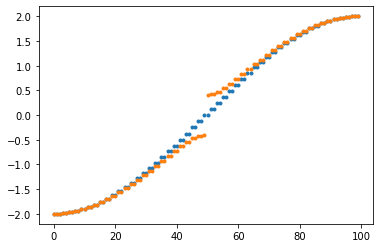

In [3]:
A_SSH = SSH_hamiltonian_periodic(50, 0)
A_SSH1 = SSH_hamiltonian_periodic(50, 0.2)
plt.plot(np.sort(np.linalg.eigvals(A_SSH)), ".")
plt.plot(np.sort(np.linalg.eigvals(A_SSH1)), ".")

In [4]:
def corr_matrix(N1, Delta):
    eps = 1e-15
    eigenvalues, eigenvectors = np.linalg.eigh(SSH_hamiltonian_periodic(N1, Delta))
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    N = N1*2
    Corr_matrix = np.zeros((N,N), dtype = "complex")    
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                Corr_matrix[i][j] += np.conjugate(eigenvectors[:,k][i])*(eigenvectors[:,k][j])
    return Corr_matrix  

In [5]:
Numer = 2
Delta1 = 0.5
corr_matrix(Numer, Delta1)[Numer:Numer*2, 0:Numer]

array([[ 1.11022302e-16+0.j, -5.00000000e-01+0.j],
       [-5.00000000e-01+0.j,  0.00000000e+00+0.j]])

In [6]:
corr_matrix(Numer, Delta1)

array([[ 5.00000000e-01+0.j, -5.55111512e-17+0.j,  1.11022302e-16+0.j,
        -5.00000000e-01+0.j],
       [-5.55111512e-17+0.j,  5.00000000e-01+0.j, -5.00000000e-01+0.j,
         0.00000000e+00+0.j],
       [ 1.11022302e-16+0.j, -5.00000000e-01+0.j,  5.00000000e-01+0.j,
        -5.55111512e-17+0.j],
       [-5.00000000e-01+0.j,  0.00000000e+00+0.j, -5.55111512e-17+0.j,
         5.00000000e-01+0.j]])

In [7]:
def corr_matrix_A(N1, Delta):
    return corr_matrix(N1, Delta)[0:N1, 0:N1]

In [8]:
def entang_entropy_A(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return S

In [9]:
def entang_entropy_A1(N, Delta):
    CM = corr_matrix_A(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):  
        S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
    return(S)

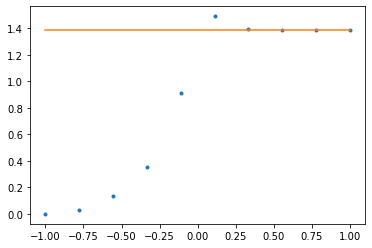

In [10]:
M = 10
N = 50
Delta = np.linspace(-1,1,M)
Entropy_array = np.array([entang_entropy_A(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

# FOURIER Transform

In [11]:
def u_func(k, Delta, N):
    lambda1 = (1 - Delta) + (1 + Delta)*np.exp(-(2*np.pi/N)*1j*k)
    s = np.sqrt(lambda1 / np.conjugate(lambda1))
    u1 = -(1/np.sqrt(2))*np.array([-1, s]) 
    u2 = -(1/np.sqrt(2))*np.array([1, s])
    return u1, u2 

Почему u_func не работает? Надо пересчитать! Что там с блоховскими состояниями?

In [12]:
def u_func_new(k, Delta, N):
    H = np.array([[0, (1 - Delta) + (1 + Delta)*np.exp(-(2*np.pi/N)*1j*k)],[(1 - Delta) + (1 + Delta)*np.exp((2*np.pi/N)*1j*k), 0]])
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvectors

In [13]:
N = 8
for k in range(N):
    print(u_func_new(k, 0.2, N)[:,0])

[-0.70710678+0.j  0.70710678+0.j]
[-0.70710678-0.j          0.6287107 +0.32360911j]
[-0.70710678-0.j          0.39223227+0.58834841j]
[-0.70710678+0.j         -0.04037414+0.70595321j]
[-0.70710678+0.00000000e+00j -0.70710678+2.59786817e-16j]
[-0.70710678+0.j         -0.04037414-0.70595321j]
[-0.70710678-0.j          0.39223227-0.58834841j]
[-0.70710678-0.j          0.6287107 -0.32360911j]


In [14]:
for k in range(6):
    print(np.exp(1j*2*np.pi*k/N)/np.sqrt(2))

(0.7071067811865475+0j)
(0.5+0.5j)
(4.329780281177466e-17+0.7071067811865475j)
(-0.4999999999999999+0.5j)
(-0.7071067811865475+8.659560562354932e-17j)
(-0.5000000000000001-0.4999999999999999j)


In [15]:
def corr_matrix_new(N1, Delta):
    N = N1*2
    eps = 1e-15
    C = np.zeros((N,N),dtype = "complex")
    for i in range(N):
        for j in range(N):
            for k in range(N//2):
                    C[i][j] += (1/N1)*np.conjugate(u_func_new(k, Delta, N1)[:,0][i%2])*np.exp(-(2*np.pi/N1)*1j*k*(i//2 - j//2))*u_func_new(k, Delta, N1)[:,0][j%2]
    return C

In [16]:
C = corr_matrix_A(10, 0.05)
eigenvalues = np.linalg.eigvalsh(C)
idx = eigenvalues.argsort()[::1]   
eigenvalues = eigenvalues[idx]
print(eigenvalues)
print(eigenvalues[-3-1] + eigenvalues[3])

[2.29795828e-07 2.29795828e-07 3.21659367e-03 3.21659367e-03
 5.00000000e-01 5.00000000e-01 9.96783406e-01 9.96783406e-01
 9.99999770e-01 9.99999770e-01]
0.9999999999999986


In [17]:
def corr_matrix_A_new(N, Delta):
    return corr_matrix_new(N, Delta)[0:N, 0:N]

In [18]:
def entang_entropy_A_new(N, Delta):
    CM = corr_matrix_A_new(N, Delta)
    S = 0.0
    lambd = np.linalg.eigvalsh(CM)
    for i in range(np.shape(CM)[0]):
        if lambd[i] > 1e-14 and (1 - lambd[i]) > 1e-14:     
            S -= lambd[i]*np.log(lambd[i]) + (1 - lambd[i])*np.log(1 - lambd[i])
        else:
            S -= 0
    return(S)

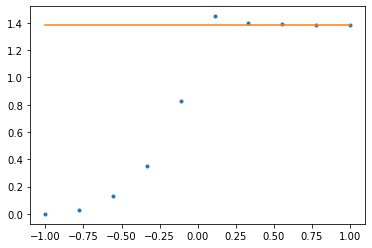

In [19]:
M = 10
N = 10
Delta = np.linspace(-1,1,M)
Entropy_array_new = np.array([entang_entropy_A_new(N, Delta[i]) for i in range(M)])
plt.plot(Delta, Entropy_array_new, ".")
plt.plot(Delta, np.ones(Delta.size)*2*np.log(2))

In [20]:
#symmetry of the correlation matrix A

Num = 50
Delta = 0.9
S = corr_matrix_A(Num, Delta)
S_eigvals = np.linalg.eigvalsh(S)
S_new = []
for i in range(Num//2):
    S_new.append(S_eigvals[i] + S_eigvals[-i-1])
S_new = np.array(S_new)
print("S old = ", S_eigvals)
print("S new = ", S_new)

S old =  [-5.23391544e-16 -4.97914811e-16 -3.70224246e-16 -3.51218758e-16
 -3.01493660e-16 -2.38743418e-16 -1.97888462e-16 -1.53922413e-16
 -1.03857259e-16 -9.75506218e-17 -6.43654685e-17 -1.74359356e-18
  2.53029130e-17  6.79349035e-17  1.06274189e-16  1.19095519e-16
  1.79403206e-16  2.83508849e-16  2.92488284e-16  3.45218662e-16
  6.93887087e-16  8.16081279e-16  3.00573026e-08  3.00573028e-08
  5.00000000e-01  5.00000000e-01  9.99999970e-01  9.99999970e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
S new =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [21]:
def Z_n(n, alpha, eigenvalues, N1):
    Z = 1.0
    for m in range(N1):
        lam = eigenvalues[m]
        Z *= ((lam**n)*np.exp(1j*alpha*(1 - lam)) + ((1 - lam)**n)*np.exp(-1j*alpha*lam))
    return Z


#real Z_N expression

In [22]:
def eigval_corr_matrix(N1,Delta):
    C = corr_matrix_A(N1, Delta)
    eigenvalues= np.linalg.eigvalsh(C)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    return eigenvalues

def Z_n_real(n, alpha, eigenvalues, N1):
    Z = 1.0
    for m in range(N1//2):
        lam = eigenvalues[m]
        Z *= (lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))
    return Z

'''def Z_n_real(n, alpha, Delta, N1):
    #alpha goes from -pi to pi
    C = corr_matrix_A(N1, Delta)
    eigenvalues= np.linalg.eigvalsh(C)
    idx = eigenvalues.argsort()[::1]   
    eigenvalues = eigenvalues[idx]
    Z = 1.0
    for m in range(N1//2):
        lam = eigenvalues[m]
        Z *= (lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))
    return Z'''

'def Z_n_real(n, alpha, Delta, N1):\n    #alpha goes from -pi to pi\n    C = corr_matrix_A(N1, Delta)\n    eigenvalues= np.linalg.eigvalsh(C)\n    idx = eigenvalues.argsort()[::1]   \n    eigenvalues = eigenvalues[idx]\n    Z = 1.0\n    for m in range(N1//2):\n        lam = eigenvalues[m]\n        Z *= (lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))\n    return Z'

In [23]:
'''N = 10
alpha_test = np.array([2*np.pi*j/N for j in range(N)])
Delta = 1
typ = 1
Z_n_test = np.array(Z_n(typ, alpha_test[i], Delta, N) for i in range(N))
plt.plot(alpha_test, Z_n_test)'''

'N = 10\nalpha_test = np.array([2*np.pi*j/N for j in range(N)])\nDelta = 1\ntyp = 1\nZ_n_test = np.array(Z_n(typ, alpha_test[i], Delta, N) for i in range(N))\nplt.plot(alpha_test, Z_n_test)'

In [24]:
def log_Z_n(n, alpha, eigenvalues, N1):
    #alpha goes from 0 to 2 pi
    Z = 1.0
    for m in range(N1):
        lam = eigenvalues[m]
        Z += np.log(((lam**n)*np.exp(1j*alpha*(1 - lam)) + ((1 - lam)**n)*np.exp(-1j*alpha*lam)))
    return Z

In [25]:
def log_Z_n_real(n, alpha, eigenvalues, N1):
    #alpha goes from 0 to 2 pi
    Z = 1.0
    for m in range(N1//2):
        lam = eigenvalues[m]
        Z += np.log(lam**(2*n) + (1 - lam)**(2*n) + 2*(lam**n)*((1 - lam)**n)*np.cos(alpha))
    return Z

In [26]:
N_A = 50
N  = N_A + 1
type_num = 1

Delta_array = np.array([-1, 1,-0.5, 0.5, -0.2, 0.2, -0.1, 0.1, -0.01, 0.01])
alpha_array =  np.array([2*np.pi*i/N for i in range(N)])

In [27]:
print(alpha_array) 
#do not count 0 2pi twice FOR ALPHA AND FOR Q

[0.         0.12319971 0.24639942 0.36959914 0.49279885 0.61599856
 0.73919827 0.86239798 0.9855977  1.10879741 1.23199712 1.35519683
 1.47839654 1.60159625 1.72479597 1.84799568 1.97119539 2.0943951
 2.21759481 2.34079453 2.46399424 2.58719395 2.71039366 2.83359337
 2.95679309 3.0799928  3.20319251 3.32639222 3.44959193 3.57279165
 3.69599136 3.81919107 3.94239078 4.06559049 4.1887902  4.31198992
 4.43518963 4.55838934 4.68158905 4.80478876 4.92798848 5.05118819
 5.1743879  5.29758761 5.42078732 5.54398704 5.66718675 5.79038646
 5.91358617 6.03678588 6.1599856 ]


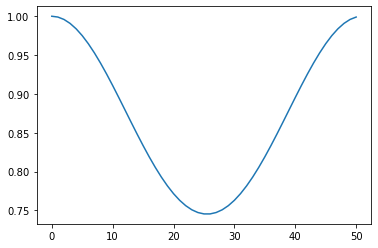

In [28]:
A= eigval_corr_matrix(N_A, Delta_array[4])
Z_n_array0 = np.array([Z_n_real(type_num, alpha_array[i], A, N_A) for i in range(N)])
plt.plot(Z_n_array0)

In [29]:
Corr_matrix_eigvals = []
for i in range(Delta_array.size):
    Corr_matrix_eigvals.append(eigval_corr_matrix(N_A, Delta_array[i]))

In [30]:
Z_n_array = []
for j in range(Delta_array.size):
    Z_n_array.append(np.array([Z_n_real(type_num, alpha_array[i], Corr_matrix_eigvals[j], N_A) for i in range(N)]))

Text(0.5, 1.0, '$\\delta$ = 1, N =51')

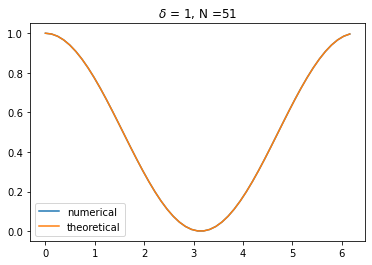

In [31]:
# For delta = 1

plt.plot(alpha_array, Z_n_array[1], label = "numerical") #numerical result 
plt.plot(alpha_array, np.cos(alpha_array/2)**2, label = "theoretical") #theoretical result
plt.legend()
plt.title("$\delta$ = 1, N =" + str(N))

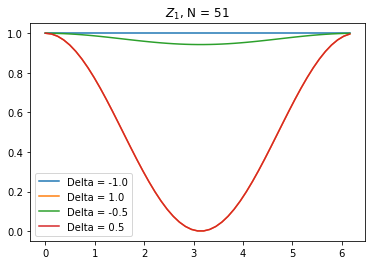

In [32]:
for i in range(4):
    plt.plot(alpha_array, Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

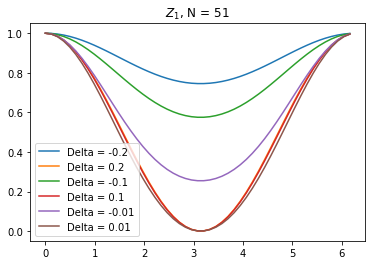

In [33]:
for i in range(4,Delta_array.size):
    plt.plot(alpha_array, Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

In [34]:
N_A = 50
N  = N_A + 1
typ = 2

log_Z_n_array = []
for j in range(Delta_array.size):
    log_Z_n_array.append(np.array([log_Z_n_real(typ, alpha_array[i], Corr_matrix_eigvals[j], N_A) for i in range(N)]))

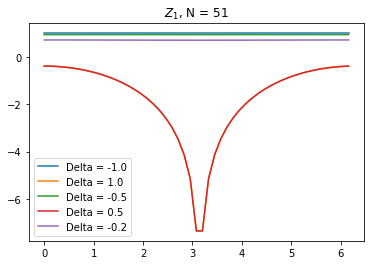

In [35]:
for i in range(Delta_array.size//2):
    plt.plot(alpha_array, log_Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

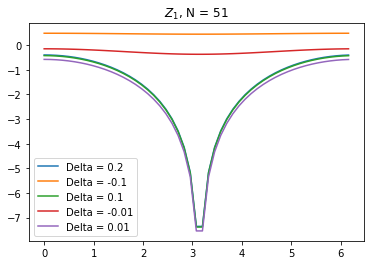

In [36]:
for i in range(Delta_array.size//2,Delta_array.size):
    plt.plot(alpha_array, log_Z_n_array[i], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1$, N = " + str(N))

In [37]:
def DFT(array):
#N should be even, if N is odd, you need to change np.concatenate((array_k[N//2:N], array_k[0:N//2])
    N = array.size
    array_k = np.zeros(N)
    for k in range(N):
        for i in range(N):
            array_k[k] += (1/np.sqrt(N))*(array[i]*np.cos(2*np.pi*k*i/(N)))
    return np.concatenate((array_k[(N//2+1):N], array_k[0:(N//2+1)]))

In [38]:
def DFT_half(array):
    N = array.size
    array_k = np.zeros(N)
    for k in range(-N//2 + 1,N//2 + 1):
        array_k[k] = array[0]/(np.sqrt(N))
        for i in range(1,N//2 + 1):
            array_k[k] += 2*(1/np.sqrt(N))*(array[i]*np.cos(2*np.pi*k*i/(N)))
    return np.concatenate((array_k[(N//2+1):N], array_k[0:(N//2+1)]))

In [39]:
print("half ", DFT_half(Z_n_array[1]))
print("full",  DFT(Z_n_array[1]))

half  [ 1.29282639e-16  2.75895572e-17 -2.72371915e-16  8.32104839e-16
  6.48136059e-16  9.15608735e-17  1.00287346e-15  5.65763799e-16
  9.06664067e-17 -6.56999411e-16 -1.77673631e-16 -3.25802753e-17
  1.19048109e-15  3.06639479e-16  3.30627452e-16  3.44044454e-16
  1.23436417e-16  1.81630969e-16  2.27736666e-16  4.12213666e-16
  2.15918863e-16  2.27682456e-18  1.80519662e-16 -2.90078291e-16
  1.78535711e+00  3.57071421e+00  1.78535711e+00 -2.90078291e-16
  1.80519662e-16  2.27682456e-18  2.15918863e-16  4.12213666e-16
  2.27736666e-16  1.81630969e-16  1.23436417e-16  3.44044454e-16
  3.30627452e-16  3.06639479e-16  1.19048109e-15 -3.25802753e-17
 -1.77673631e-16 -6.56999411e-16  9.06664067e-17  5.65763799e-16
  1.00287346e-15  9.15608735e-17  6.48136059e-16  8.32104839e-16
 -2.72371915e-16  2.75895572e-17  1.29282639e-16]
full [-4.16333634e-16 -4.30211422e-15  4.16333634e-16  6.13398221e-15
  3.81639165e-15 -1.24900090e-16 -7.24420524e-15  2.76167977e-15
 -3.91353616e-15  1.06858966e

In [40]:
q_array = np.array([i for i in range(N)])

Text(0.5, 1.0, '$Z_1 (q)$, $N_A$ = 50')

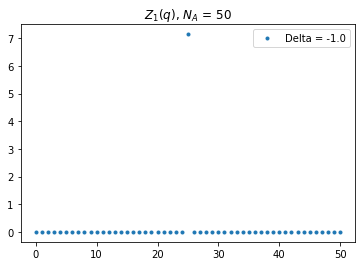

In [41]:
plt.plot(q_array, DFT_half(Z_n_array[0]),".", label = "Delta = " + str(Delta_array[0]))
plt.legend()
plt.title("$Z_1 (q)$, $N_A$ = " + str(N_A))

Z_N_array, delta = 1.0
[1.00000000e+00 9.96210255e-01 9.84898468e-01 9.66236115e-01
 9.40506097e-01 9.08098456e-01 8.69504459e-01 8.25309150e-01
 7.76182486e-01 7.22869178e-01 6.66177400e-01 6.06966542e-01
 5.46134180e-01 4.84602471e-01 4.23304173e-01 3.63168505e-01
 3.05107063e-01 2.50000000e-01 1.98682682e-01 1.51933027e-01
 1.10459713e-01 7.48914321e-02 4.57673641e-02 2.35289998e-02
 8.51345016e-03 9.48335631e-04 9.48335631e-04 8.51345016e-03
 2.35289998e-02 4.57673641e-02 7.48914321e-02 1.10459713e-01
 1.51933027e-01 1.98682682e-01 2.50000000e-01 3.05107063e-01
 3.63168505e-01 4.23304173e-01 4.84602471e-01 5.46134180e-01
 6.06966542e-01 6.66177400e-01 7.22869178e-01 7.76182486e-01
 8.25309150e-01 8.69504459e-01 9.08098456e-01 9.40506097e-01
 9.66236115e-01 9.84898468e-01 9.96210255e-01]


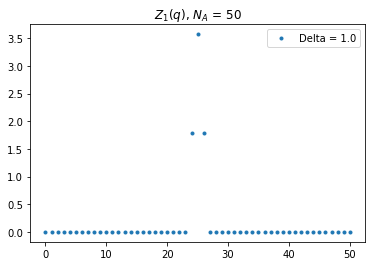

In [42]:
plt.plot(q_array, DFT(Z_n_array[1]),".", label = "Delta = " + str(Delta_array[1]))
plt.legend()
plt.title("$Z_1 (q)$, $N_A$ = " + str(N_A))
print("Z_N_array, delta = " + str(Delta_array[1]), Z_n_array[1], sep = "\n")

In [43]:
def IDFT(array):
    N = array.size
    array = np.concatenate((array[(N//2):N], array[0:(N//2)]))
    array_k = np.zeros(N)
    for k in range(0,N):
        for i in range(0,N):
            array_k[k] += (1/(np.sqrt(N)))*(array[i]*np.cos(2*np.pi*k*i/N))
    return array_k

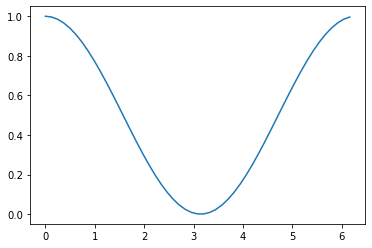

In [44]:
plt.plot(alpha_array, IDFT(DFT(Z_n_array[1])))

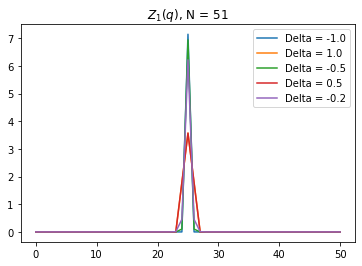

In [45]:
for i in range(Delta_array.size//2):
    plt.plot(q_array, DFT(Z_n_array[i]), label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1 (q)$, N = " + str(N))

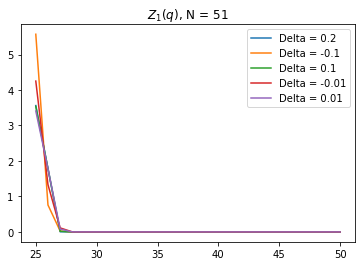

In [46]:
for i in range(Delta_array.size//2, Delta_array.size):
    plt.plot(q_array[q_array.size//2:q_array.size], DFT(Z_n_array[i])[q_array.size//2:q_array.size], label = "Delta = " + str(Delta_array[i]))
    plt.legend()
    plt.title("$Z_1 (q)$, N = " + str(N))

Text(0.5, 1.0, '$Z_1 (q)$, N = 51')

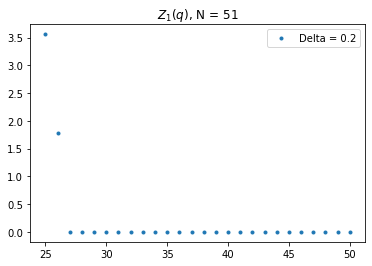

In [47]:
plt.plot(q_array[q_array.size//2:q_array.size], DFT(Z_n_array[5])[q_array.size//2:q_array.size], ".", label = "Delta = " + str(Delta_array[5]))
plt.legend()
plt.title("$Z_1 (q)$, N = " + str(N))

# Logarithm of $Z_1$

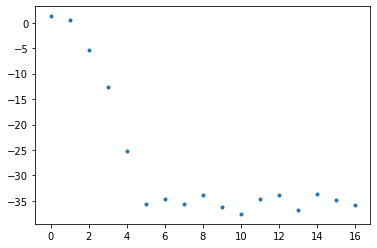

In [48]:
#Here we only plot for q >= <q>, because of the symmetry

Z_q = DFT(Z_n_array[5])[q_array.size//2:q_array.size]
Z_q_new = []
for i in range(Z_q.size):
    if Z_q[i] > 0:
        Z_q_new.append(Z_q[i])

plt.plot(np.log(Z_q_new), ".")

In [49]:
print(np.log(DFT(Z_n_array[5])[q_array.size//2:q_array.size]))
print(DFT(Z_n_array[5])[q_array.size//2:q_array.size])

[  1.27007975   0.57961665  -5.3414673  -12.64347746 -25.17608902
          nan -35.59736629 -34.70536825          nan -35.59736629
          nan          nan -33.91096733 -36.18615345          nan
 -37.56347914 -34.64185484 -33.84642881 -36.87033196          nan
          nan          nan          nan -33.63445856 -34.79089042
 -35.72519966]
[ 3.56113654e+00  1.78535388e+00  4.78883890e-03  3.22854993e-06
  1.16456428e-11 -7.63278329e-16  3.46944695e-16  8.46545056e-16
 -3.46944695e-16  3.46944695e-16 -3.81639165e-16 -1.03042574e-15
  1.87350135e-15  1.92554306e-16 -1.68962067e-15  4.85722573e-17
  9.02056208e-16  1.99840144e-15  9.71445147e-17 -3.05311332e-16
 -2.51187959e-15 -1.97064587e-15 -2.41473508e-15  2.47024623e-15
  7.77156117e-16  3.05311332e-16]


C:\Users\MI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


C:\Users\MI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '$\\log Z_1 (q)$, N = 51')

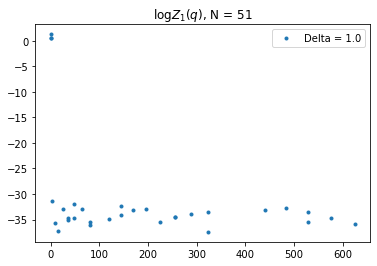

In [60]:
plt.plot((q_array - q_array.size//2)**2, np.log(DFT(Z_n_array[1])), ".", label = "Delta = " + str(Delta_array[1]))
plt.legend()
plt.title("$\log Z_1 (q)$, N = " + str(N))

C:\Users\MI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\MI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '$\\log Z_1 (q)$, N = 51')

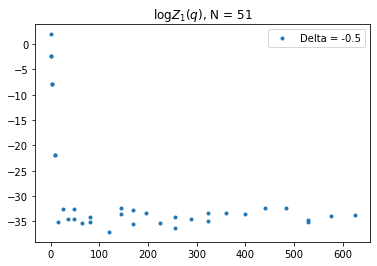

In [59]:
plt.plot((q_array - q_array.size//2)**2, np.log(DFT(Z_n_array[2])), ".", label = "Delta = " + str(Delta_array[2]))
plt.legend()
plt.title("$\log Z_1 (q)$, N = " + str(N))